# $T_\text{ini}=30$ K, tempo: $3\cdot10^{-12}$ s

### Mercoledì 05/11/2025

---

## Importazioni

In [1]:
import numpy as np

In [2]:
import sys
sys.path.append('../') 

### Cristallo

In [3]:
from libraries.CrystalStructure import CrystalStructure as Crystal
# Insert a valid file name here
filename = '../../data/fcc100a256.txt'

### Dinamica

La simulazione parte da 30K e va a 3ps. L'idea è cambiare il time step e vedere come cambia il rapporto tra deviazione standard dell'energia e la sua media.

In [4]:
from libraries.CrystalDynamics import CrystalDynamics as Dynamics
from libraries.CrystalDynamicsNumpy2 import CrystalDynamicsNumpy as Dynamics
# tempo totale
tempo_tot = 1e-12
# and an initial temperature T = 30 K
T = 30
# declare the atomic mass of the atoms considered
silver_mass = 108

time_steps = np.array([1e-15, 2e-15, 3e-15, 4e-15, 5e-15])

# Ciclo sui vari dt

In [5]:
E_tot_means = []
E_tot_stds = []

In [6]:
for dt in time_steps:
    # Initialize a Crystal object using the from_file method (constructor)
    cristallo = Crystal.from_file(filename)
    # il numero di n_steps dipende dal dt scelto
    n_steps = int(tempo_tot/dt)
    print(f"\n--- Simulazione con dt = {dt} s, n_steps = {n_steps} ---")
    simulazione = Dynamics(cristallo, atomic_mass=silver_mass, dt=dt, temp_ini=T)
    simulazione.set_seed(12316543)
    meta_E_tot, _, _ = simulazione.run_dynamics(n_steps=n_steps, output=False, debug=False)
    
    E_tot_means.append(np.mean(meta_E_tot))
    E_tot_stds.append(np.std(meta_E_tot))


--- Simulazione con dt = 1e-15 s, n_steps = 999 ---
⚠️  Vicini non calcolati in precedenza. Calcolo con R_C=inf.

--- Simulazione con dt = 2e-15 s, n_steps = 499 ---
⚠️  Vicini non calcolati in precedenza. Calcolo con R_C=inf.

--- Simulazione con dt = 3e-15 s, n_steps = 333 ---
⚠️  Vicini non calcolati in precedenza. Calcolo con R_C=inf.

--- Simulazione con dt = 4e-15 s, n_steps = 249 ---
⚠️  Vicini non calcolati in precedenza. Calcolo con R_C=inf.

--- Simulazione con dt = 5e-15 s, n_steps = 200 ---
⚠️  Vicini non calcolati in precedenza. Calcolo con R_C=inf.


## Grafico $\delta E/\langle E\rangle$ vs dt

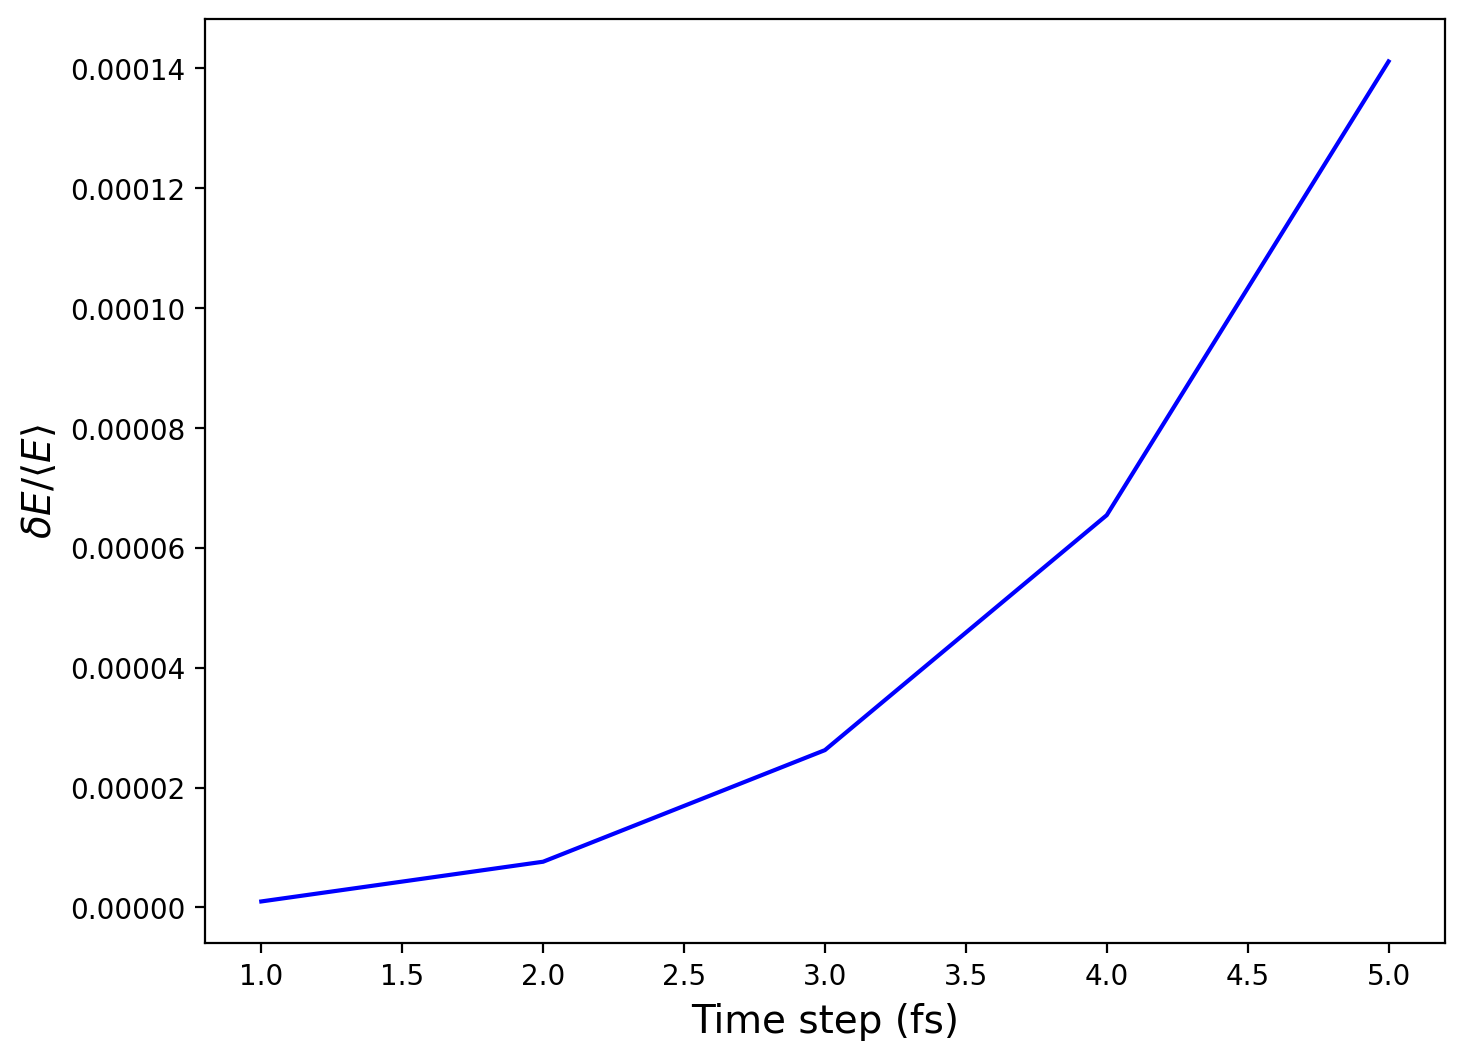

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6), dpi=200)
plt.plot(time_steps*1e15, np.array(E_tot_stds)/np.abs(np.array(E_tot_means)), color='blue')
plt.xlabel('Time step (fs)', fontsize=14)
plt.ylabel(r'$\delta E/\langle E \rangle$', fontsize=14)
plt.show()